# **Hyperparameter Tuning Techniques**

### **Problem Statement**
### **Objective:**
Develop and optimize classification models to predict the presence of diabetes based on various health metrics.

### **Dataset:**
The dataset includes features such as glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, and age, with the target variable being whether the patient has diabetes (Outcome).

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, auc
import seaborn as sns
import matplotlib.pyplot as plt

### **Load Dataset** 

In [62]:
file_path = 'E:/BytewiseIntersnhip/Task29/diabetes.csv'
df = pd.read_csv(file_path)

### **Columns to check for 0 values and replace with the median**
By replacing zero values with the median, we ensure that the dataset is more accurate and reliable for analysis or modeling. If zero values are left unaddressed, they could distort statistical analyses and predictive models, leading to incorrect conclusions or predictions.

In [63]:
df['Glucose'] = np.where(df['Glucose'] == 0, df['Glucose'].median(), df['Glucose'])

### **Define independent and dependent variables**
"X"----> Creates a new DataFrame that contains all the columns from df except for the 'Outcome' column. This X will be used as the feature set for training the model.

"Y"----> that contains only the Outcome column from df. This y will be used as the target variable for training the model.

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### **Train-test split**
30% of the data will be used for testing, and the remaining 80% will be used for training.

Randomstate: you ensure that every time you run the code, the split between training and testing data will be the same.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### **Random Forest Classifier**
 Initializes and trains a RandomForestClassifier.

In [7]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### **Make Prediction**
 Uses the trained model to make predictions on the testing data.

In [8]:
y_pred = rf_classifier.predict(X_test)

### **Evaluation Matrics**
Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives.

Accuracy Score: Ratio of correctly predicted observations to the total observations.

Classification Report: Provides precision, recall, and F1-score for each class.

In [9]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[118  33]
 [ 31  49]]
Accuracy Score: 0.7229437229437229
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       151
           1       0.60      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



### **Confusion Matrix Visualization**
Visualizes the confusion matrix using a heatmap.

cm = confusion_matrix(y_test, y_pred): Computes the confusion matrix.

plot_confusion_matrix(cm, 'RandomForestClassifier Confusion Matrix'): Calls the function to plot the confusion matrix.

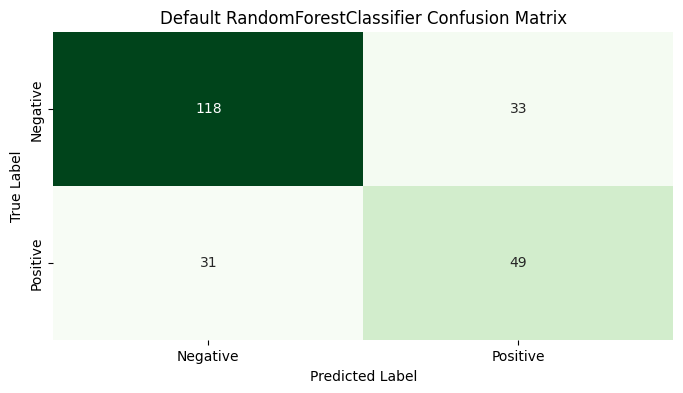

In [10]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, 
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'Default RandomForestClassifier Confusion Matrix')


# **1. GridSearchCV**

**Definition**: `GridSearchCV` is a technique for hyperparameter tuning in machine learning. It searches through a specified grid of hyperparameters to find the combination that yields the best performance based on a chosen metric.

**Usage**: It automates the process of hyperparameter tuning by evaluating all possible combinations of hyperparameters through cross-validation.

**Mathematical Formula**:
$$
\text{Metric}_{\text{best}} = \arg\max_{\text{params}} \left( \frac{1}{k} \sum_{i=1}^k \text{Metric}_{i}(\text{params}) \right)
$$
where:
- \( \text{Metric}_{\text{best}} \) is the best performance metric score.
- \( k \) is the number of folds in cross-validation.
- \( \text{Metric}_{i}(\text{params}) \) is the performance score on the \( i \)-th fold using hyperparameters \( \text{params} \).




### **Import** 
GridSearchCV is a tool from the sklearn.model_selection module in Scikit-learn used for hyperparameter tuning.

In [11]:
from sklearn.model_selection import GridSearchCV

### **Prameter Grid** : A dictionary where the keys are the hyperparameters of the model and the values are lists of options to be tested.
n_estimators: Number of trees in the forest. More trees generally improve performance but increase computational cost.

max_depth: Maximum depth of each tree. Controls complexity; deeper trees capture more detail but may overfit.

min_samples_split: Minimum samples required to split a node. Higher values prevent overfitting by ensuring nodes are split only when there are enough samples.

min_samples_leaf: Minimum samples required at a leaf node. Larger values reduce overfitting by making leaf nodes less specific.

bootstrap: Whether to use bootstrap samples (random sampling with replacement). Helps in reducing variance and improving robustness.

In [12]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


### **Initialize GridSearchCV with expanded parameter grid**
estimator: Specifies the model (RandomForestClassifier) to optimize.

param_grid: Dictionary of hyperparameters to test.

cv=5: Uses 5-fold cross-validation for robust evaluation.

n_jobs=-1: Utilizes all CPU cores to speed up the process.

verbose=2: Provides detailed progress logs during the search.


In [13]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

### **Fitting Grid Search**
 Executes the grid search on the training data (X_train, y_train).

In [14]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

### **Print the best parameters**
Displays the hyperparameters that produced the best model during the grid search.

In [15]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


### **Use the best model from GridSearchCV**
Retrieves the model with the best hyperparameters found during the grid search.

In [16]:
best_model = grid_search.best_estimator_

### **Predict on the test set**
Uses the optimized model (best_model) to make predictions on the test dataset (X_test).

In [17]:
y_pred = best_model.predict(X_test)

### **Evaluation Matrics**


In [18]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[120  31]
 [ 29  51]]
Accuracy Score: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### **Confusion Matrix Visualization**
Visualizes the confusion matrix using a heatmap.

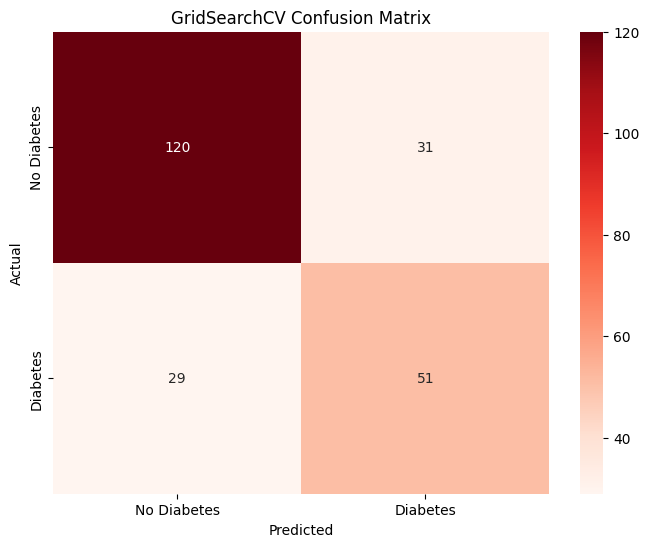

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GridSearchCV Confusion Matrix')
plt.show()


# **2. RandomizedSearchCV**

**Definition**: `RandomizedSearchCV` is a hyperparameter optimization technique that searches through a random subset of hyperparameter space, rather than exhaustively. It samples a fixed number of parameter settings from specified distributions.

**Usage**: It is used to find the best hyperparameters for a model more efficiently than `GridSearchCV`, especially when dealing with large hyperparameter spaces.

**Mathematical Formula**:
$$
\text{Metric}_{\text{best}} = \arg\max_{\text{params} \in \text{Sample}} \text{Metric}(\text{params})
$$
where:
- \( \text{Metric}_{\text{best}} \) is the best performance metric score.
- \( \text{Sample} \) is a random sample of hyperparameter settings.
- \( \text{Metric}(\text{params}) \) is the performance score for a given set of hyperparameters.



### **Import**
A tool for hyperparameter optimization that performs a randomized search over specified parameter values, rather than an exhaustive search like GridSearchCV.

In [23]:
from sklearn.model_selection import RandomizedSearchCV

### **parameter distributions for RandomizedSearchCV**
'param_distributions:' A dictionary defining the range of hyperparameters to sample from for RandomizedSearchCV.

'n_estimators': List of integers ranging from 100 to 2000, created using np.linspace(). This parameter controls the number of trees in the random forest.

'max_depth': List of integers ranging from 10 to 200, plus None. This parameter sets the maximum depth of the trees.

'min_samples_split': List of possible values (2, 5, 10, 15) that determine the minimum number of samples required to split an internal node.

'min_samples_leaf': List of possible values (1, 2, 4, 6) that determine the minimum number of samples required to be at a leaf node.

In [24]:
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
    'max_depth': [int(x) for x in np.linspace(start=10, stop=200, num=10)] + [None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

### **Fit RandomizedSearchCV**
random_search: An instance of RandomizedSearchCV, which has been initialized with the parameter distributions and other configurations (like the number of iterations and cross-validation strategy).

fit(X_train, y_train): Trains the RandomizedSearchCV object on the training data (X_train and y_train).

In [27]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_distributions=param_distributions,
    n_iter=100, 
    cv=5,        
    n_jobs=-1,   
    verbose=2,   
    random_state=0
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=0, verbose=2)

### **Print the best parameters**
Retrieve Best Parameters: After fitting RandomizedSearchCV on the training data, best_params_ will hold the hyperparameters that gave the best performance during the search.

Display Results: This line prints the best combination of hyperparameters found by RandomizedSearchCV. This helps in understanding which settings optimized the model's performance.

In [28]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 311, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 73}


### **Use the best model from RandomizedSearchCV**
Retrieve the Best Model: random_search.best_estimator_ provides the model instance that achieved the highest performance based on the criteria set in RandomizedSearchCV.

Assign to Variable: best_model_random is assigned this optimal model instance, which has been trained with the best hyperparameters found during the randomized search.

In [29]:
best_model_random = random_search.best_estimator_

### **Predict on the test set**
 Uses the optimized model (best_model) to make predictions on the test dataset (X_test).


In [30]:
y_pred_random = best_model_random.predict(X_test)


### **Evaluation Matrics**

In [31]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))
print("Accuracy Score:", accuracy_score(y_test, y_pred_random))
print("Classification Report:\n", classification_report(y_test, y_pred_random))


Confusion Matrix:
 [[122  29]
 [ 29  51]]
Accuracy Score: 0.7489177489177489
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



### **Confusion Matrix Visualization**
 Visualizes the confusion matrix using a heatmap.

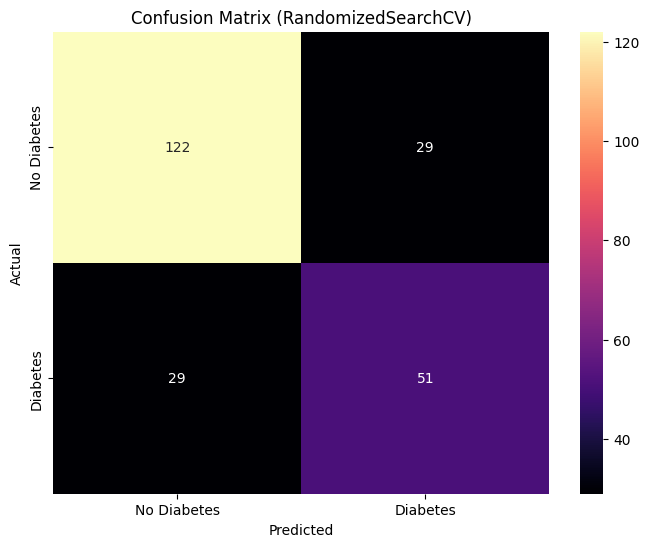

In [32]:
cm_random = confusion_matrix(y_test, y_pred_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random, annot=True, fmt='d', cmap='magma', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RandomizedSearchCV)')
plt.show()


# **3. Bayesian Optimization**

**Definition**: Bayesian Optimization is a probabilistic model-based optimization technique used to find the minimum of an objective function. It is particularly effective for optimizing hyperparameters in machine learning models when function evaluations are costly.

**Usage**: It explores the hyperparameter space efficiently by building a probabilistic model (e.g., Gaussian Process) of the objective function and using it to decide where to sample next. This approach balances exploration and exploitation.

**Mathematical Formula**:
The Expected Improvement (EI) acquisition function, used to decide the next point to sample, is defined as:
$$
\text{EI}(x) = \mathbb{E}[\max(0, f(x^*) - f(x))]
$$
where:
- \( f(x) \) is the objective function value at point \( x \).
- \( x^* \) is the best observed point.
- \( \mathbb{E} \) denotes the expectation with respect to the surrogate model.


### **Liabraries**
BayesSearchCV: Utilizes Bayesian optimization to search for optimal hyperparameters more efficiently than grid search.
Integer: Allows you to specify integer constraints for hyperparameters during optimization.







In [33]:
from skopt import BayesSearchCV
from skopt.space import Integer


### **Param_space**
param_space: A dictionary defining the range of hyperparameters to be optimized using Bayesian optimization.

Integer(100, 500):

Purpose: Specifies that the n_estimators hyperparameter (number of trees in the Random Forest) should be an integer between 100 and 500.
Integer(10, 50):

Purpose: Specifies that the max_depth hyperparameter (maximum depth of each tree) should be an integer between 10 and 50.
Integer(2, 10):

Purpose: Specifies that the min_samples_split hyperparameter (minimum number of samples required to split an internal node) should be an integer between 2 and 10.
Integer(1, 4):

Purpose: Specifies that the min_samples_leaf hyperparameter (minimum number of samples required to be at a leaf node) should be an integer between 1 and 4.

In [34]:
# Define the parameter space for Bayesian Optimization
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4)
}

### **Initialize RandomForestClassifier**
RandomForestClassifier: A machine learning model from the sklearn.ensemble module used for classification tasks. It creates a forest of decision trees, usually trained with the "bagging" method, to improve prediction accuracy and control overfitting.

random_state=0: Sets the seed for the random number generator. This ensures that the results are reproducible; every time you run the code, you get the same initialization of the random forest, which is useful for debugging and consistent comparisons.

In [35]:
rf_classifier = RandomForestClassifier(random_state=0)

### **Intilize BayesSearch**
BayesSearchCV: A class from the skopt library used for hyperparameter optimization with Bayesian optimization. It searches for the best parameters by fitting the model multiple times with different hyperparameter values and using Bayesian methods to guide the search.

rf_classifier: The RandomForestClassifier instance that you want to optimize.

param_space: Defines the range of hyperparameters to search over, such as the number of estimators, depth of trees, etc.

n_iter=50: Specifies the number of iterations to perform. In each iteration, Bayesian optimization will explore different combinations of hyperparameters within the specified space.

cv=5: Sets the number of cross-validation folds to evaluate each set of hyperparameters. This helps in assessing the performance of the model more reliably.

scoring='accuracy': The metric used to evaluate the performance of the model. In this case, it uses accuracy as the criterion for selecting the best hyperparameters.

n_jobs=-1: Utilizes all available CPU cores to speed up the computation.

In [36]:
bayes_search = BayesSearchCV(
    rf_classifier,
    param_space,
    n_iter=50, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


### **Fit Bayesian Optimization**
 trains the RandomForestClassifier while performing Bayesian optimization to find the best hyperparameters for the model, using cross-validation to ensure robust performance evaluation.

In [37]:
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
              scoring='accuracy',
              search_spaces={'max_depth': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

### **Print the best parameters and score**
Best Parameters: Displays the optimal hyperparameter values that gave the best model performance.
Best Score: Shows the highest performance metric achieved with these best parameters.

In [38]:
print("Best Parameters from Bayesian Optimization:", bayes_search.best_params_)
print("Best Score from Bayesian Optimization:", bayes_search.best_score_)


Best Parameters from Bayesian Optimization: OrderedDict({'max_depth': 33, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 125})
Best Score from Bayesian Optimization: 0.7858082381446867


### **Use the best model from Bayesian Optimization**
This variable stores the model instance with the optimal hyperparameters that yielded the highest performance during the Bayesian optimization. You can now use this model to make predictions, evaluate performance, or further analyze its behavior.


In [39]:
best_model_bayes = bayes_search.best_estimator_

### **Predict on the test set**
This variable will contain the predicted values for the test set based on the optimized model. These predictions can be used to evaluate the performance of the model using metrics such as accuracy, confusion matrix, or classification report.


In [40]:
y_pred_bayes = best_model_bayes.predict(X_test)


### **Print evaluation metrics**

In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bayes))
print("Accuracy Score:", accuracy_score(y_test, y_pred_bayes))
print("Classification Report:\n", classification_report(y_test, y_pred_bayes))


Confusion Matrix:
 [[122  29]
 [ 29  51]]
Accuracy Score: 0.7489177489177489
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



### **Visualize Confusion Matrix**


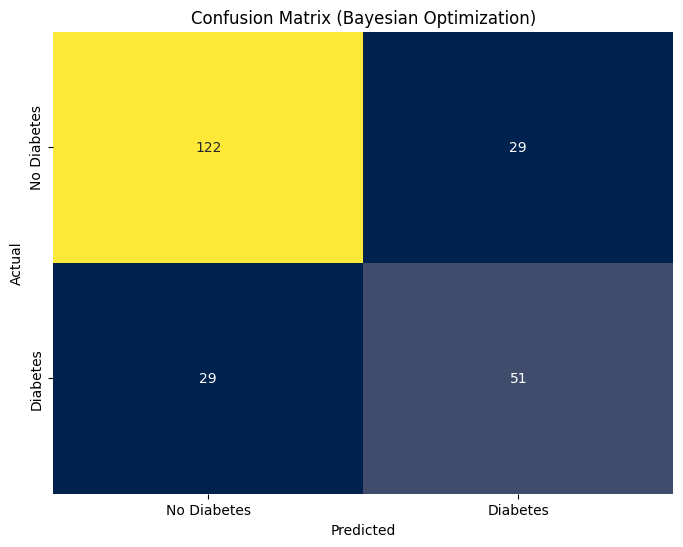

In [42]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='cividis', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Bayesian Optimization)')
plt.show()


# **4. Sequential Model-Based Optimization (SMBO) using `skopt` Library's `Optimizer`**

**Definition**: SMBO is a strategy for optimizing functions by iteratively building a probabilistic model and using it to select new points to evaluate. The `skopt` library's `Optimizer` class implements SMBO for efficient optimization of hyperparameters or other objective functions.

**Usage**: SMBO optimizes a function by updating a probabilistic model (e.g., Gaussian Process) and selecting new points to evaluate based on the model's predictions. It is useful for expensive function evaluations.

**Mathematical Formula**:
The Expected Improvement (EI) acquisition function is used in SMBO:
$$
\text{EI}(x) = \mathbb{E}[\max(0, f(x^*) - f(x))]
$$
where:
- \( f(x) \) is the objective function value at point \( x \).
- \( x^* \) is the best observed point.
- \( \mathbb{E} \) denotes the expectation with respect to the surrogate model.



### **Import Optimizer from skopt:**

Optimizer is a class used for Bayesian optimization, which helps in finding the best hyperparameters for a model by iteratively exploring the hyperparameter space.
Import Integer from skopt.space:

Integer is a class that defines a hyperparameter as an integer within a specific range. It is used to specify the bounds of integer-valued hyperparameters in optimization tasks.

In [43]:
from skopt import Optimizer
from skopt.space import Integer

### **parameter space**

This variable defines the parameter space for optimizing a model using Sequential Model-Based Optimization (SMBO). Each parameter in the list is defined by a range of values that the optimizer will explore.
Integer(start, end, name):

Integer is used to specify that the hyperparameters are integers within a given range.
start and end define the inclusive range of values that the optimizer will consider for each hyperparameter.
name is an optional argument to give a name to the hyperparameter for clarity.

In [44]:
param_space_seq = [
    Integer(100, 500, name='n_estimators'),
    Integer(10, 50, name='max_depth'),
    Integer(2, 10, name='min_samples_split'),
    Integer(1, 4, name='min_samples_leaf')
]

### **Define the objective function for optimization**

Purpose: The function evaluates the performance of the RandomForestClassifier with given hyperparameters and returns a score that the optimization algorithm will use to guide the search.
Parameters (params):

params: A list of hyperparameters to be tested. These include n_estimators, max_depth, min_samples_split, and min_samples_leaf.
Create and Configure Classifier:

RandomForestClassifier: An instance of RandomForestClassifier is created with the specified hyperparameters.
Hyperparameters:
n_estimators: Number of trees in the forest.
max_depth: Maximum depth of each tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.
random_state=0: Ensures reproducibility.
Model Training and Prediction:

rf_classifier.fit(X_train, y_train): Trains the classifier using the training data.
y_pred = rf_classifier.predict(X_test): Makes predictions on the test data.
Score Calculation:

accuracy_score(y_test, y_pred): Calculates the accuracy of the model’s predictions.
Return Value:
The function returns -score, which is the negative of the accuracy. This is because optimization algorithms typically minimize the objective function, so returning the negative accuracy allows us to maximize the accuracy (higher values are better).

In [45]:
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return -score  # Minimizing negative accuracy to maximize accuracy

### **Initialize the Optimizer:**

Optimizer: This is a class from the skopt library used for performing Sequential Model-Based Optimization (SMBO). It helps in optimizing hyperparameters by sequentially evaluating promising configurations.
Parameters:

param_space_seq: The parameter space to be explored. This is a list of Integer objects defining the range of hyperparameters for optimization.

n_estimators: Number of trees in the RandomForestClassifier.
max_depth: Maximum depth of each tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.
base_estimator='GP': Specifies the type of surrogate model to use for Bayesian optimization. 'GP' stands for Gaussian Process, which models the function being optimized.



In [46]:
optimizer = Optimizer(param_space_seq, base_estimator='GP', n_initial_points=10, random_state=0)

### **Perform the optimization**
Iterative Optimization: The loop performs iterative optimization by exploring different hyperparameter values, evaluating them, and refining the search based on past results.
Objective Function Evaluation: Helps in identifying the hyperparameters that yield the best model performance by minimizing the negative accuracy.
Progress Tracking: Provides real-time updates on the best hyperparameters and their performance score at each iteration.

In [47]:
n_iterations = 30
for i in range(n_iterations):
    next_point = optimizer.ask()
    objective_value = objective(next_point)
    optimizer.tell(next_point, objective_value)
    best_point = optimizer.Xi[np.argmin(optimizer.yi)]  # Get the best point
    best_value = -np.min(optimizer.yi)  # Get the best score
    print(f"Iteration {i+1}/{n_iterations}: {best_point} -> Score: {best_value}")

Iteration 1/30: [np.int64(337), np.int64(44), np.int64(9), np.int64(4)] -> Score: 0.7532467532467533
Iteration 2/30: [np.int64(337), np.int64(44), np.int64(9), np.int64(4)] -> Score: 0.7532467532467533
Iteration 3/30: [np.int64(337), np.int64(44), np.int64(9), np.int64(4)] -> Score: 0.7532467532467533
Iteration 4/30: [np.int64(337), np.int64(44), np.int64(9), np.int64(4)] -> Score: 0.7532467532467533
Iteration 5/30: [np.int64(247), np.int64(48), np.int64(3), np.int64(4)] -> Score: 0.7619047619047619
Iteration 6/30: [np.int64(247), np.int64(48), np.int64(3), np.int64(4)] -> Score: 0.7619047619047619
Iteration 7/30: [np.int64(247), np.int64(48), np.int64(3), np.int64(4)] -> Score: 0.7619047619047619
Iteration 8/30: [np.int64(247), np.int64(48), np.int64(3), np.int64(4)] -> Score: 0.7619047619047619
Iteration 9/30: [np.int64(247), np.int64(48), np.int64(3), np.int64(4)] -> Score: 0.7619047619047619
Iteration 10/30: [np.int64(247), np.int64(48), np.int64(3), np.int64(4)] -> Score: 0.761904

This code identifies and displays the hyperparameters that resulted in the best model performance based on the objective function, helping in selecting the optimal model configuration.

In [48]:
best_params_seq = optimizer.Xi[np.argmin(optimizer.yi)]
print("Best Parameters from Sequential Model-Based Optimization:", best_params_seq)


Best Parameters from Sequential Model-Based Optimization: [np.int64(303), np.int64(47), np.int64(10), np.int64(3)]


### **Train the model with the best parameters**
his code trains a RandomForestClassifier with the hyperparameters that were determined to be the best during the optimization process, aiming to achieve the highest model performance on the training data.

In [49]:
best_model_seq = RandomForestClassifier(
    n_estimators=best_params_seq[0],
    max_depth=best_params_seq[1],
    min_samples_split=best_params_seq[2],
    min_samples_leaf=best_params_seq[3],
    random_state=0
)
best_model_seq.fit(X_train, y_train)


RandomForestClassifier(max_depth=np.int64(47), min_samples_leaf=np.int64(3),
                       min_samples_split=np.int64(10),
                       n_estimators=np.int64(303), random_state=0)

### **Predict on the test set**
This line of code generates predictions using the optimized model on unseen test data. The predictions (y_pred_seq) are used to assess the model's performance by comparing them to the actual labels.

In [50]:
y_pred_seq = best_model_seq.predict(X_test)


### **Print evaluation metrics**

In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_seq))
print("Accuracy Score:", accuracy_score(y_test, y_pred_seq))
print("Classification Report:\n", classification_report(y_test, y_pred_seq))

Confusion Matrix:
 [[125  26]
 [ 27  53]]
Accuracy Score: 0.7705627705627706
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.67      0.66      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



### **Visualize Confusion Matrix**

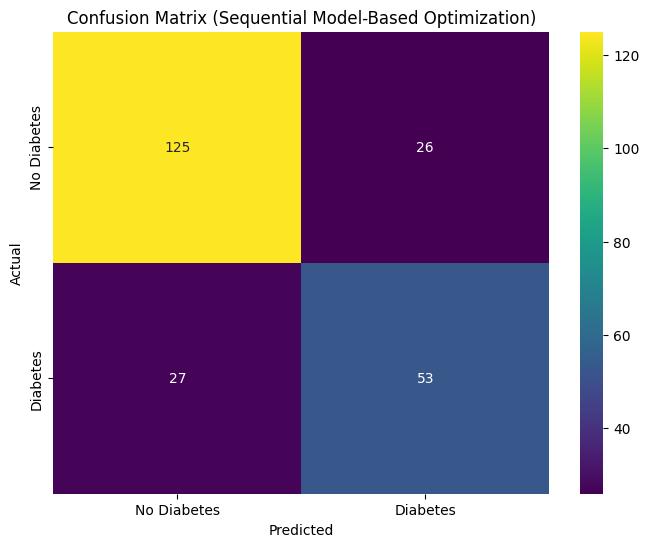

In [52]:

cm_seq = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_seq, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sequential Model-Based Optimization)')
plt.show()

# **5. Optuna - Automate Hyperparameter Tuning**

**Definition**: Optuna is an open-source hyperparameter optimization framework that automates the tuning process for machine learning models. It utilizes efficient algorithms and optimization strategies to find the best hyperparameters.

**Usage**: Optuna automates hyperparameter tuning by using advanced sampling and optimization techniques. It supports complex search spaces and includes features like pruning to terminate unpromising trials early.

**Mathematical Formula**:
The optimization process in Optuna can be described by minimizing the objective function \( f(x) \):
$$
x^* = \arg\min_x f(x)
$$
where:
- \( x^* \) is the optimal set of hyperparameters.
- \( f(x) \) is the objective function being minimized (e.g., validation loss).

**Example**:
```python
import optuna
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    
    # Create and evaluate the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    score = cross_val_score(model, X, y, cv=5).mean()
    
    return score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Create a study object
study = optuna.create_study(direction='maximize')  # Maximize the objective function

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Get the best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best Score:", best_score)


import optuna: Imports the Optuna library, which is used for hyperparameter optimization.
import logging: Imports the logging library, which provides a way to configure logging messages.
Set Optuna Logging Level:



In [53]:
import optuna
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

### **objective function for Optuna**

n_estimators = trial.suggest_int('n_estimators', 100, 500): Suggests an integer value for the number of trees in the forest, between 100 and 500.
max_depth = trial.suggest_int('max_depth', 10, 50): Suggests an integer value for the maximum depth of the tree, between 10 and 50.
min_samples_split = trial.suggest_int('min_samples_split', 2, 10): Suggests an integer value for the minimum number of samples required to split an internal node, between 2 and 10.
min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4): Suggests an integer value for the minimum number of samples required at a leaf node, between 1 and 4.
Train the Model:

rf_classifier = RandomForestClassifier(...): Initializes a RandomForestClassifier with the suggested hyperparameters.
rf_classifier.fit(X_train, y_train): Trains the model on the training data.
y_pred = rf_classifier.predict(X_test): Predicts labels on the test set.
Evaluate and Return:

accuracy = accuracy_score(y_test, y_pred): Calculates the accuracy of the model.
return 1 - accuracy: Returns 1 - accuracy because Optuna minimizes the objective function. This way, a higher accuracy corresponds to a lower value of 1 - accuracy, which Optuna will try to minimize.

In [54]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  

### **Create an Optuna study object**
This setup will allow Optuna to explore different hyperparameter configurations to find the set that results in the best performance (i.e., the lowest value of the objective function).

In [56]:
study = optuna.create_study(direction='minimize')  
study.optimize(objective, n_trials=50) 

### **Print the best parameters found**

In [57]:
print("Best Parameters from Optuna:", study.best_params)
print("Best Score from Optuna:", 1 - study.best_value)

Best Parameters from Optuna: {'n_estimators': 344, 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 3}
Best Score from Optuna: 0.7705627705627706


### **Use the best parameters to train the final model**

In [58]:
best_params_optuna = study.best_params
best_model_optuna = RandomForestClassifier(
    n_estimators=best_params_optuna['n_estimators'],
    max_depth=best_params_optuna['max_depth'],
    min_samples_split=best_params_optuna['min_samples_split'],
    min_samples_leaf=best_params_optuna['min_samples_leaf'],
    random_state=0
)
best_model_optuna.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=344, random_state=0)

### **Predict on the test set**

In [59]:
y_pred_optuna = best_model_optuna.predict(X_test)

### **Evaluation Matrics**

In [60]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optuna))
print("Accuracy Score:", accuracy_score(y_test, y_pred_optuna))
print("Classification Report:\n", classification_report(y_test, y_pred_optuna))

Confusion Matrix:
 [[125  26]
 [ 27  53]]
Accuracy Score: 0.7705627705627706
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.67      0.66      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



### **Visualize Confusion Matrix**

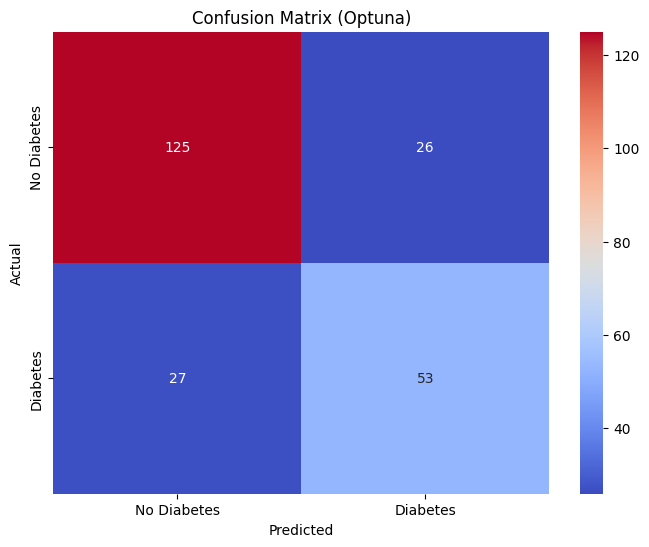

In [61]:
cm_optuna = confusion_matrix(y_test, y_pred_optuna)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optuna, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optuna)')
plt.show()